In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import ast

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills_list: ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

In [3]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

In [45]:
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month
df_da_exploded = df_da.explode('job_skills').copy() # Exploding the job_skills column


# Creating the pivot table
df_exploded_pivot = df_da_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value= 0)

# Reordering the columns based on total counts, by adding a 'Total' row, sorting by it, then removing it
df_exploded_pivot.loc['Total'] = df_exploded_pivot.sum()
df_exploded_pivot = df_exploded_pivot[df_exploded_pivot.loc['Total'].sort_values(ascending=False).index]
df_exploded_pivot = df_exploded_pivot.drop('Total')

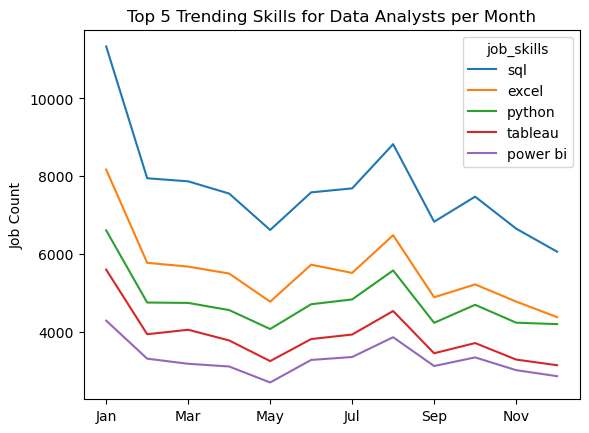

In [46]:
# Formatting the index to show month names instead of numbers, by resetting the index, 
# converting the month numbers to month names, then setting the index back
df_exploded_pivot = df_exploded_pivot.reset_index()
df_exploded_pivot['job_posted_month'] = df_exploded_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_exploded_pivot = df_exploded_pivot.set_index('job_posted_month')
df_exploded_pivot = df_exploded_pivot.drop(columns='job_posted_month_no')


# Plotting the top 5 trending skills for Data Analysts per month
df_exploded_pivot.iloc[:, :5].plot(kind='line',)
plt.title('Top 5 Trending Skills for Data Analysts per Month')
plt.ylabel('Job Count')
plt.xlabel('')
plt.show()
